In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font size="24" color="red">**Ojetivos**</font>

* <font size="4" color="lightblue">Jogos mais vendidos por **Plataforma** por **NA_Sales**, **EU_Sales**, **JP_Sales**, **Other_Sales** e **Global_Sales**</font>
* <font size="4" color="lightblue">Jogos mais vendidos por **Editora** nos **Top 30**</font>
* <font size="4" color="lightblue">Jogos mais vendidos por **Gênero**</font>
* <font size="4" color="lightblue">Jogos mais vendidos para cada **ano**</font>

In [16]:
#Criando Dataframe e importando dados CSV
pd.options.display.max_rows = 60
df = pd.read_csv('vgsales.csv')
display(df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
#Identificar as linhas com valores nulos
linhas_com_nulos = df[df.isnull().any(axis=1)]

#Exibir as linhas com valores nulos
display(linhas_com_nulos)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2173,2175,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
2286,2288,Namco Museum,XB,NaN,Misc,Unknown,0.77,0.11,0.00,0.04,0.91
2295,2297,Rhythm Heaven,Wii,NaN,Misc,Unknown,0.13,0.00,0.77,0.01,0.90
2415,2417,The Lord of the Rings: War in the North,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.25,0.45,0.01,0.15,0.86
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [26]:
df.duplicated().sum()

0

In [29]:
#Separar todos os nomes das colunas: Plataform, Genre e Publisher
plataforma = df['Platform'].unique()
genero = df['Genre'].unique()
editora = df['Publisher'].unique()

display(plataforma, genero, editora)


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [34]:
#Somar as vendas por região para obter as vendas globais por plataforma
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

#Agrupar os dados por plataforma e calcular o total de vendas para cada plataforma
vendas_por_plataforma = df.groupby('Platform')['Total_Sales'].sum()

#Ordenar as vendas por plataforma em ordem decrescente
vendas_por_plataforma = vendas_por_plataforma.sort_values(ascending=False)

#Exibir os jogos mais vendidos por plataforma
display(vendas_por_plataforma)


Platform
PS2     1255.77
X360     979.60
PS3      957.89
Wii      926.05
DS       821.46
PS       730.84
GBA      317.85
PSP      296.22
PS4      278.16
PC       257.99
XB       257.74
GB       255.46
NES      251.05
3DS      247.37
N64      218.68
SNES     200.04
GC       198.93
XOne     141.10
2600      96.98
WiiU      81.79
PSV       61.94
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Total_Sales, dtype: float64

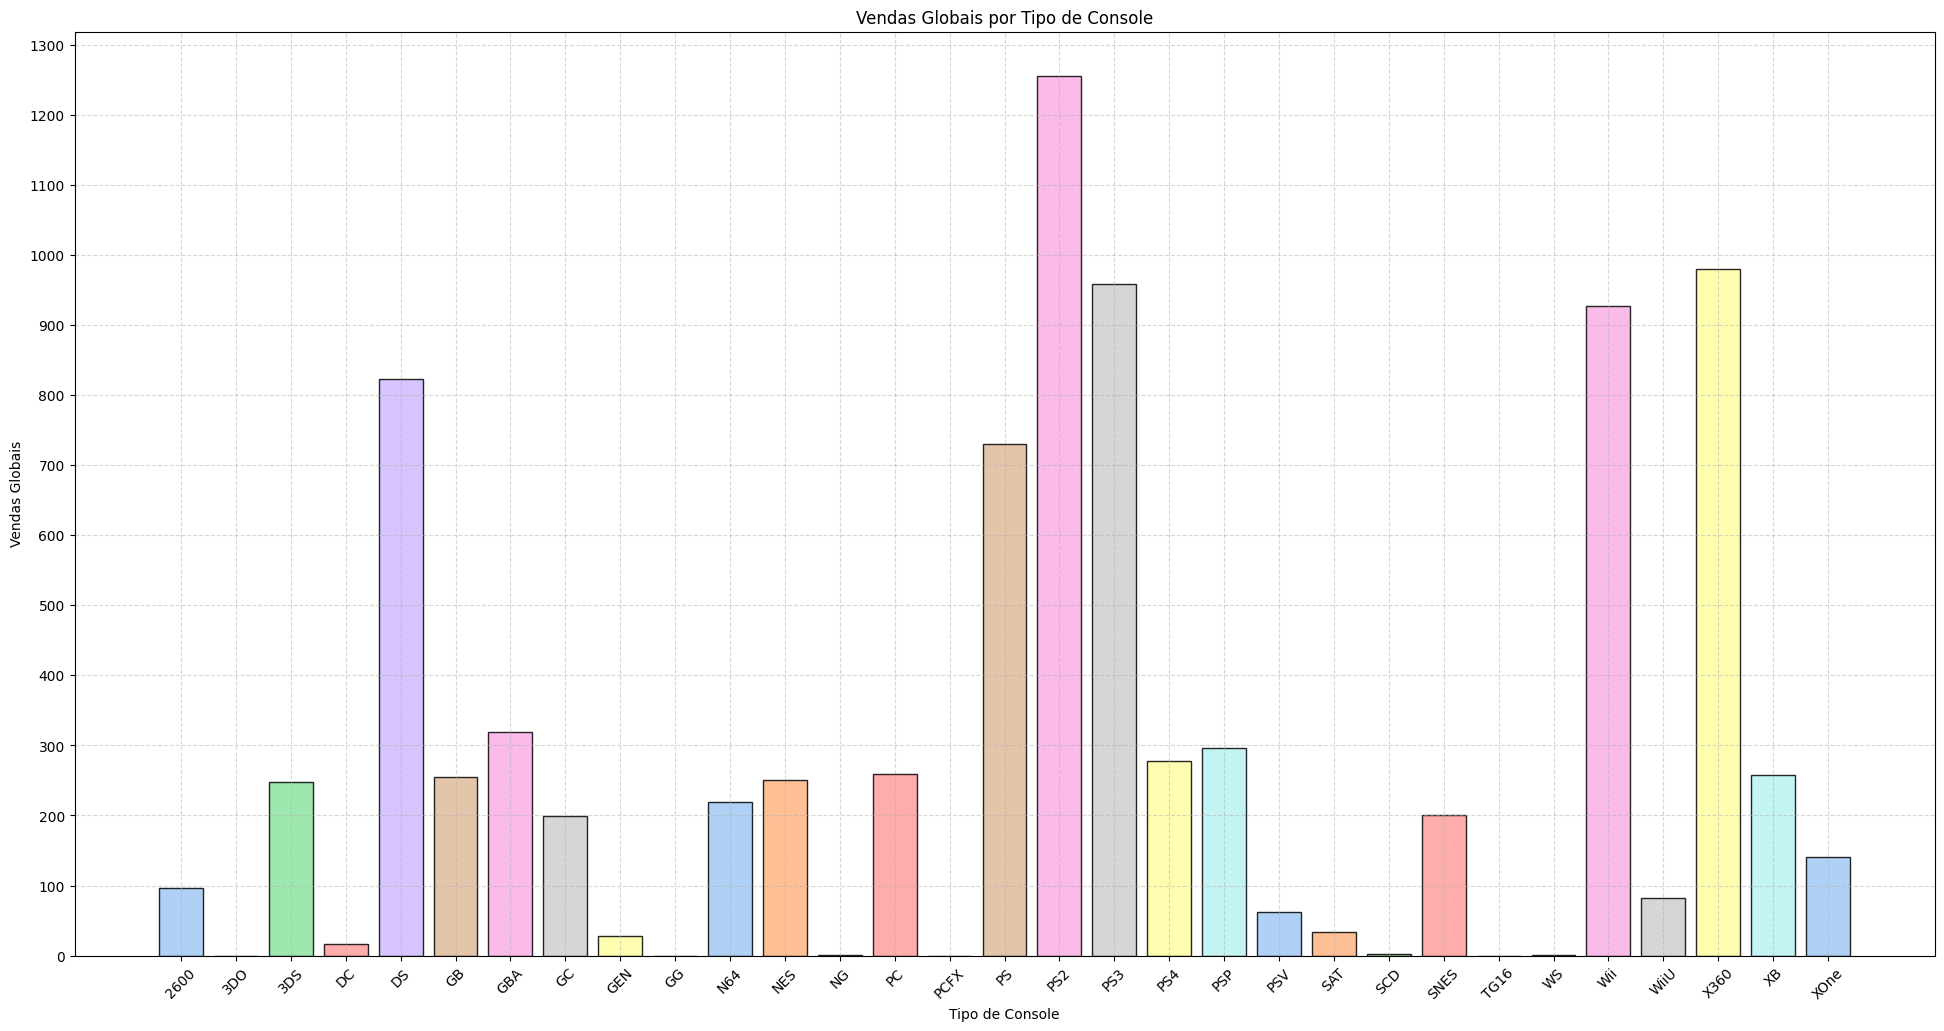

In [11]:
#Agrupar os dados por tipo de console e calcular a soma das vendas globais para cada tipo de console
vendas_por_tipo = df.groupby('Platform')['Global_Sales'].sum().reset_index()

#Definir uma paleta de cores para as barras
cores = sns.color_palette("pastel", len(vendas_por_tipo))

#Criar o gráfico de barras
plt.figure(figsize=(24, 12))
bars = plt.bar(vendas_por_tipo['Platform'], vendas_por_tipo['Global_Sales'], color=cores, edgecolor='black', alpha=.85)

#Adicionar rótulos e título ao gráfico
plt.xlabel('Tipo de Console')
plt.ylabel('Vendas Globais')
plt.title('Vendas Globais por Tipo de Console')

#Girar os rótulos do eixo x para melhor visualização
plt.yticks(range(0, int(max(vendas_por_tipo['Global_Sales'])) + 100, 100))
plt.xticks(rotation=45)

#Adicionar grid
plt.grid(True, linestyle='--', alpha=.5)

#Exibir o gráfico
plt.show()

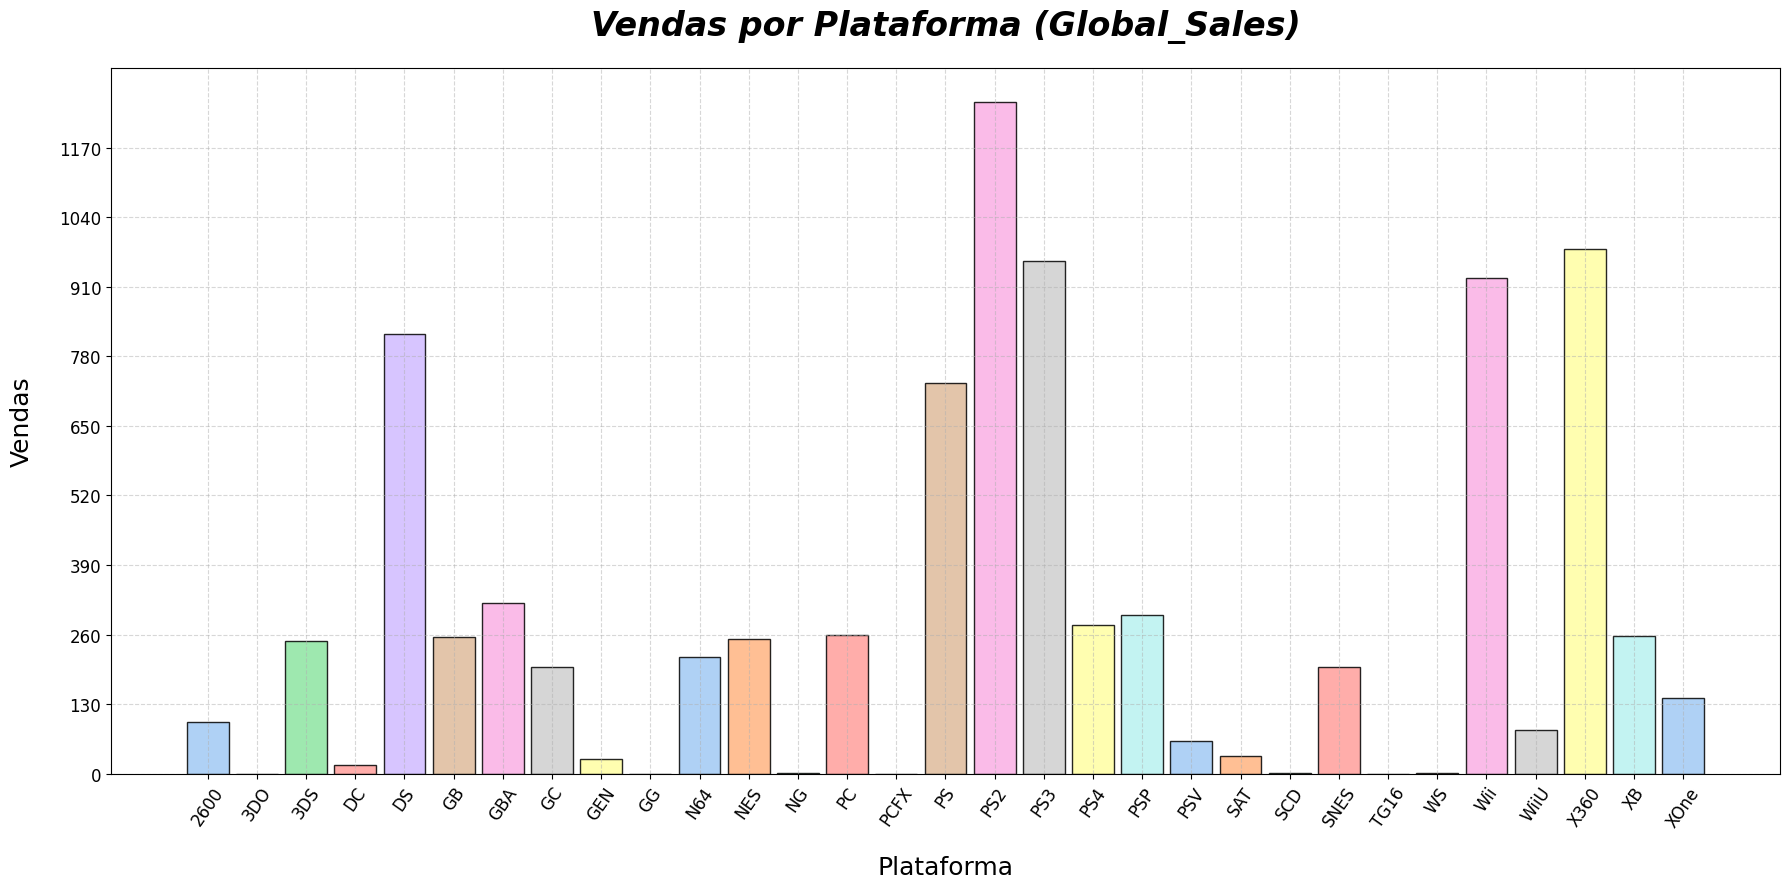

130


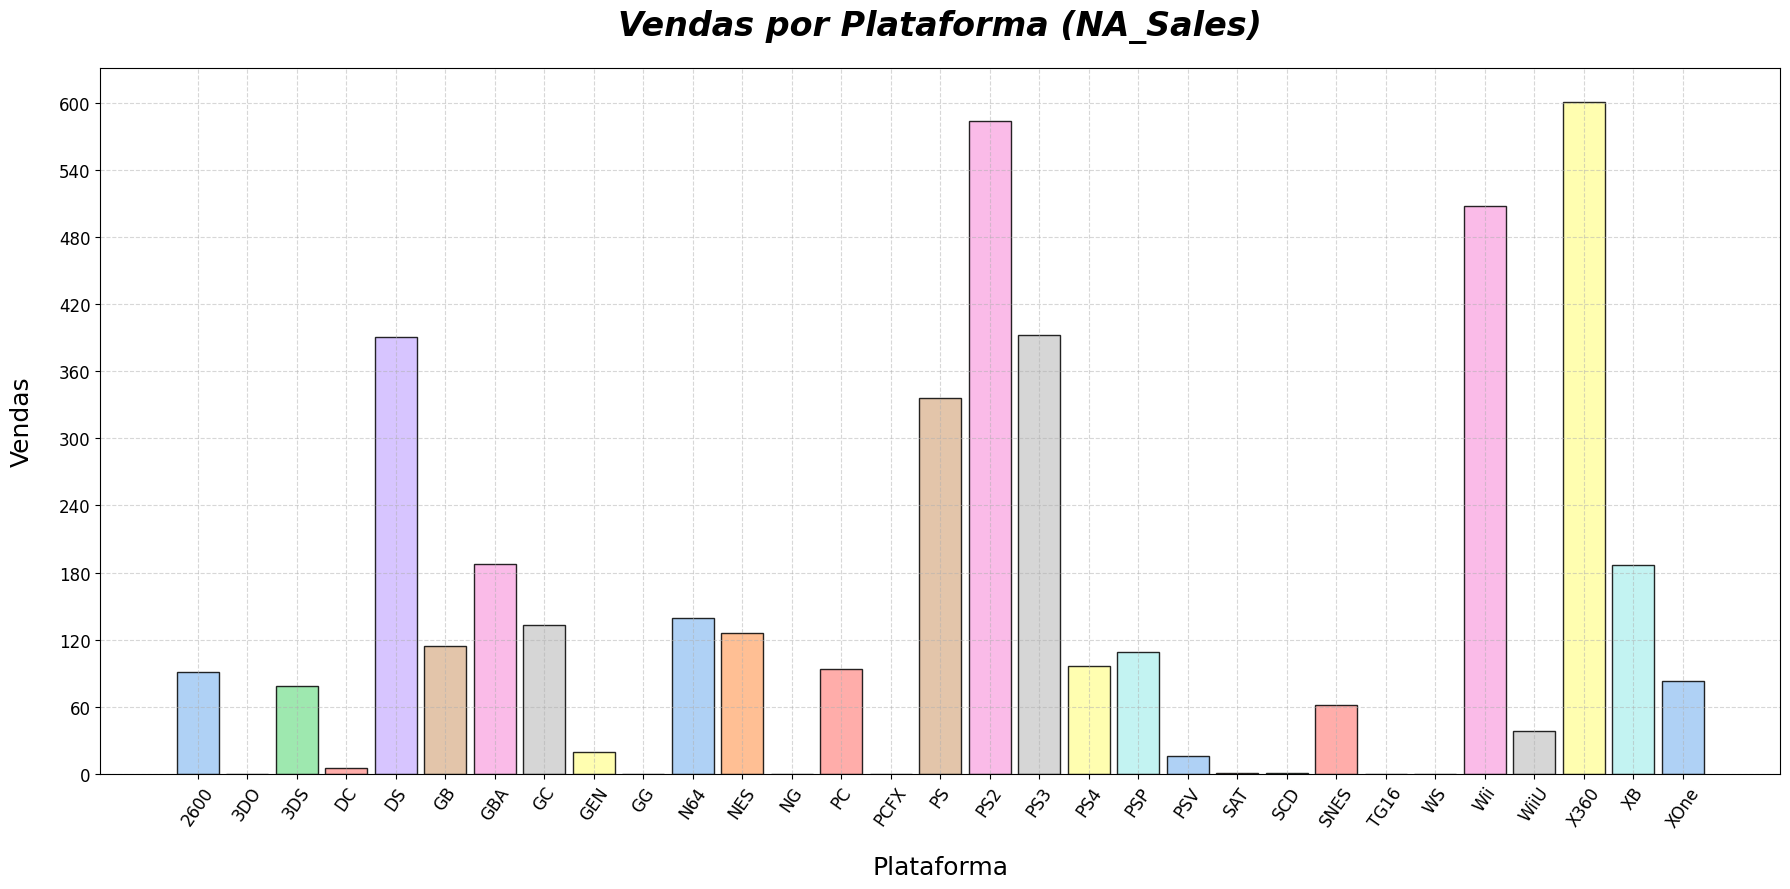

60


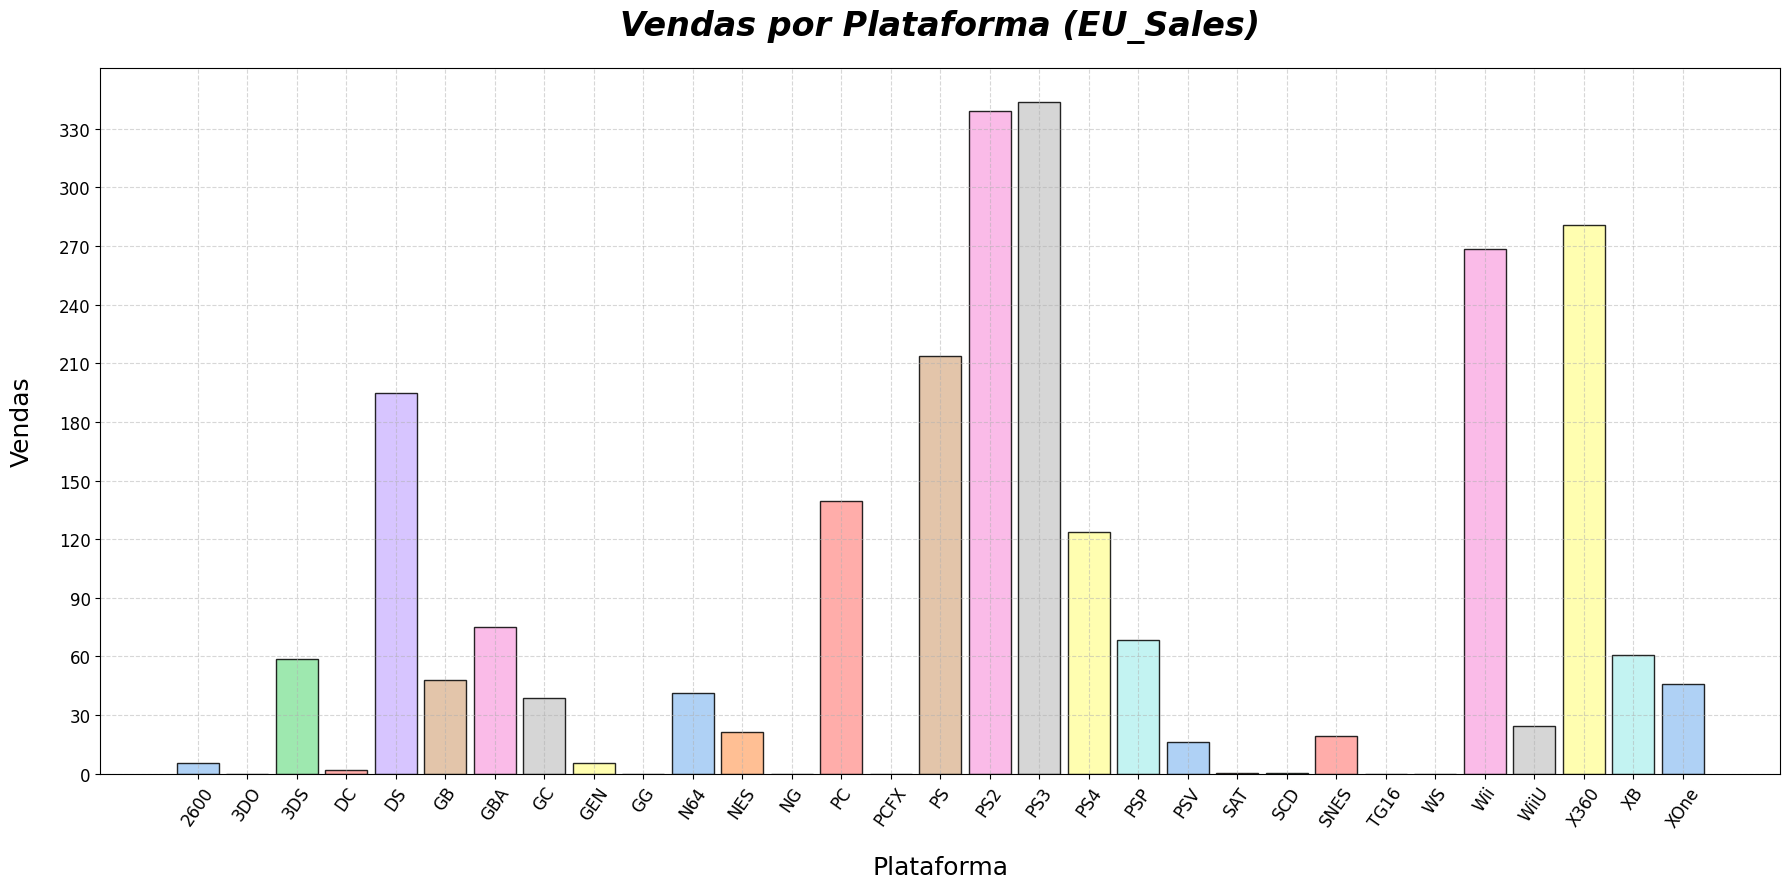

30


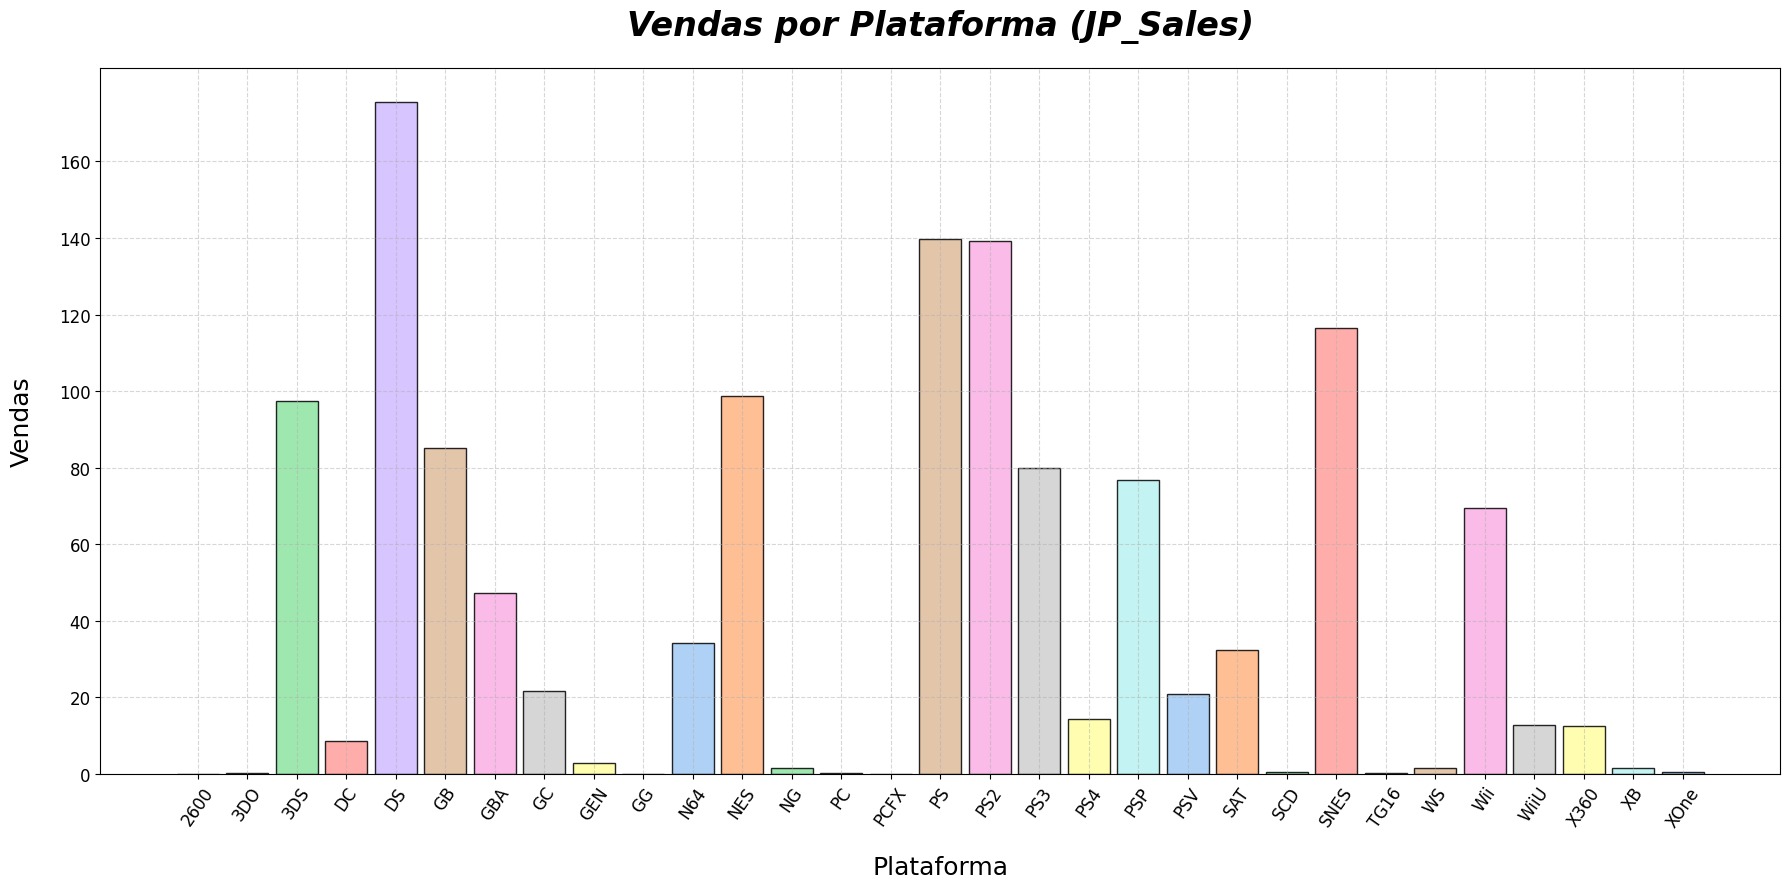

20


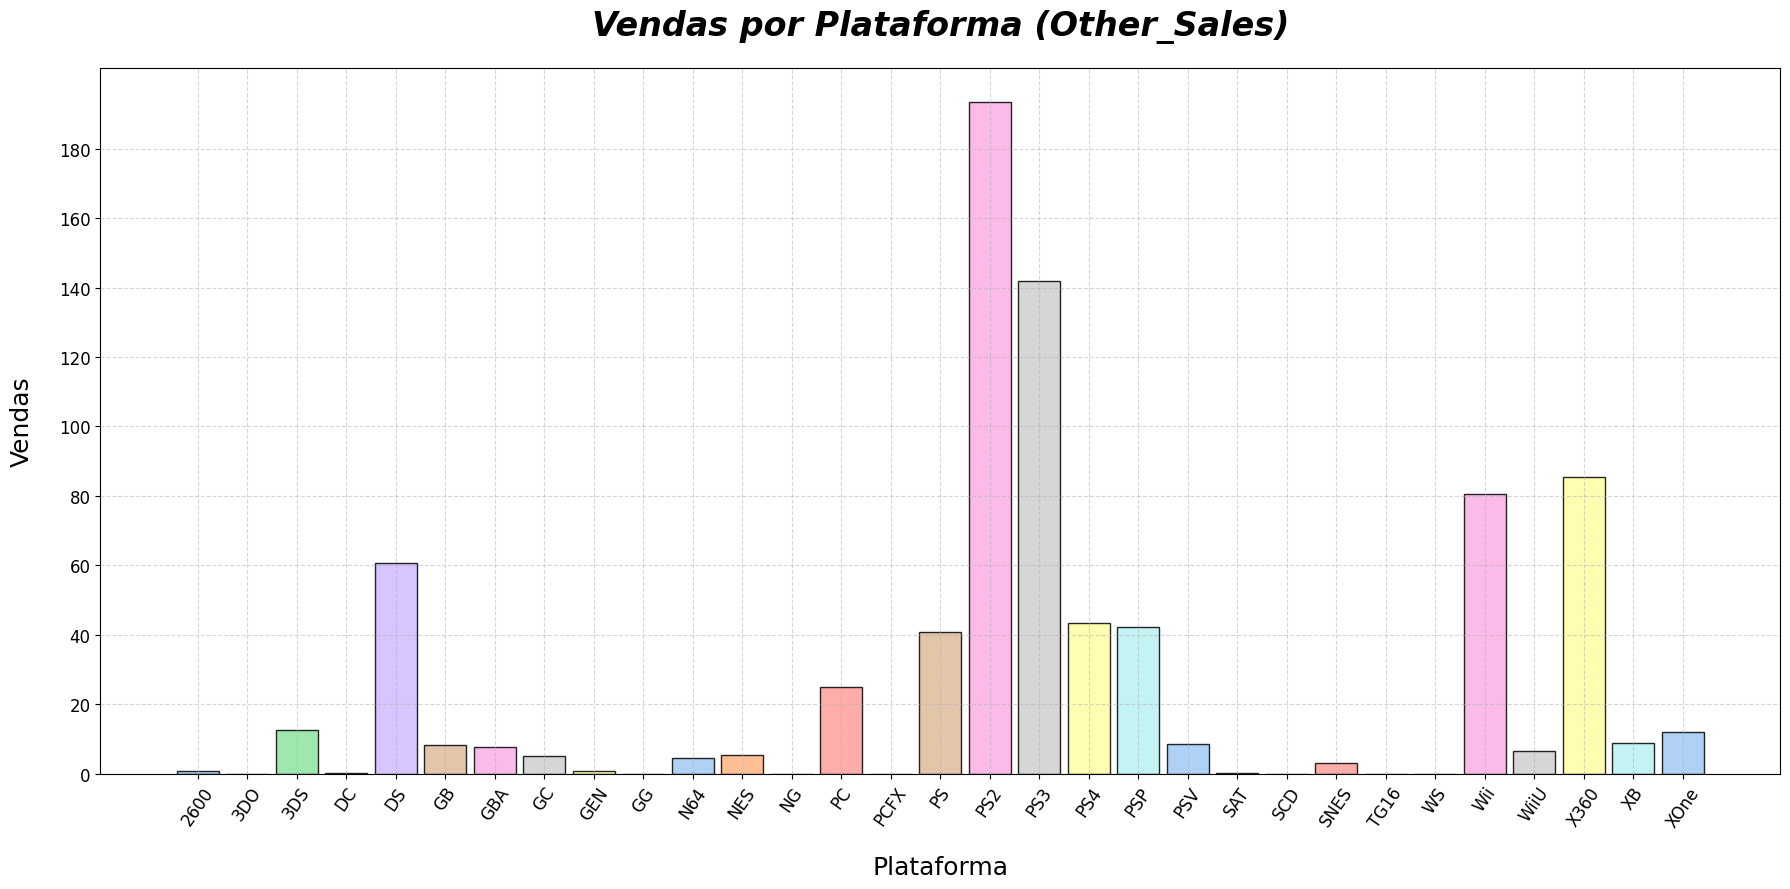

20


In [20]:
#Agrupar os dados por tipo de console e calcular a soma das vendas para cada tipo de console e cada coluna
vendas_por_tipo = df.groupby('Platform')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

#Definir uma paleta de cores para as barras
cores = sns.color_palette("pastel", len(vendas_por_tipo))

#Criar o gráfico de barras para cada coluna
for coluna, cor in zip(vendas_por_tipo.columns, cores):
    plt.figure(figsize=(18, 9))
    plt.xticks(rotation=55, size=12)
    #plt.yticks(vendas_por_tipo[coluna] / round(max(vendas_por_tipo[coluna])))
    max_value = max(vendas_por_tipo[coluna])
    incremento = round(max_value / 10)  # Defina o número de incrementos que deseja, neste caso, 10
    valor_arredondado = int(round(incremento, -1))
    plt.yticks(np.arange(0, round(max_value), valor_arredondado), size=12)

    bars = plt.bar(vendas_por_tipo.index, vendas_por_tipo[coluna], color=cores, edgecolor='black', alpha=.85, width=.85)
    
    #Adicionar rótulos e título ao gráfico
    plt.title(f'Vendas por Plataforma ({coluna})', size=24, weight='bold', style='oblique', pad=24)
    plt.xlabel('Plataforma', size=18, weight='medium', labelpad=18)
    plt.ylabel('Vendas', size=18, weight='medium', labelpad=18)
    
    #Adicionar grid
    plt.grid(True, linestyle='--', alpha=.5)
    
    #Ajustar automaticamente a posição dos subplots para evitar que partes do gráfico sejam cortadas
    plt.tight_layout()

    #Salvar o gráfico
    #plt.savefig(f'Vendas por Plataforma ({coluna}).png')

    #Exibir o gráfico
    plt.show()
    print(valor_arredondado)
    

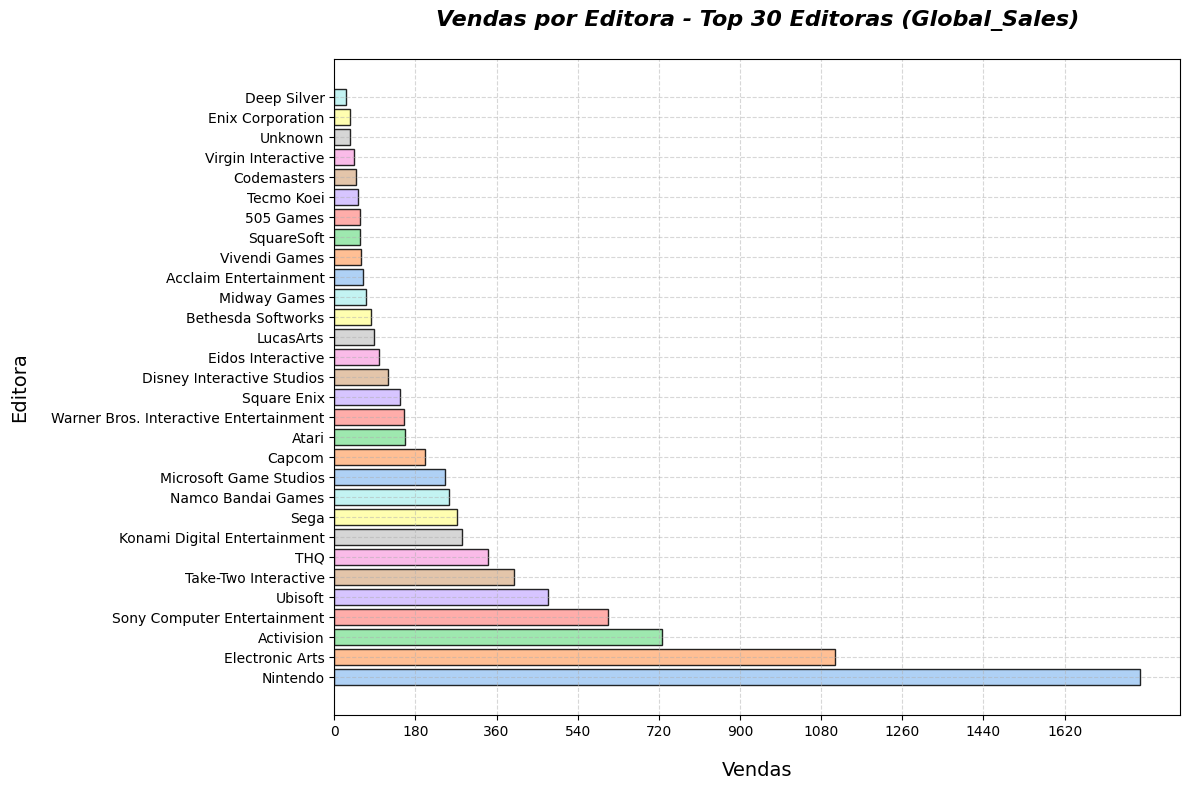

180


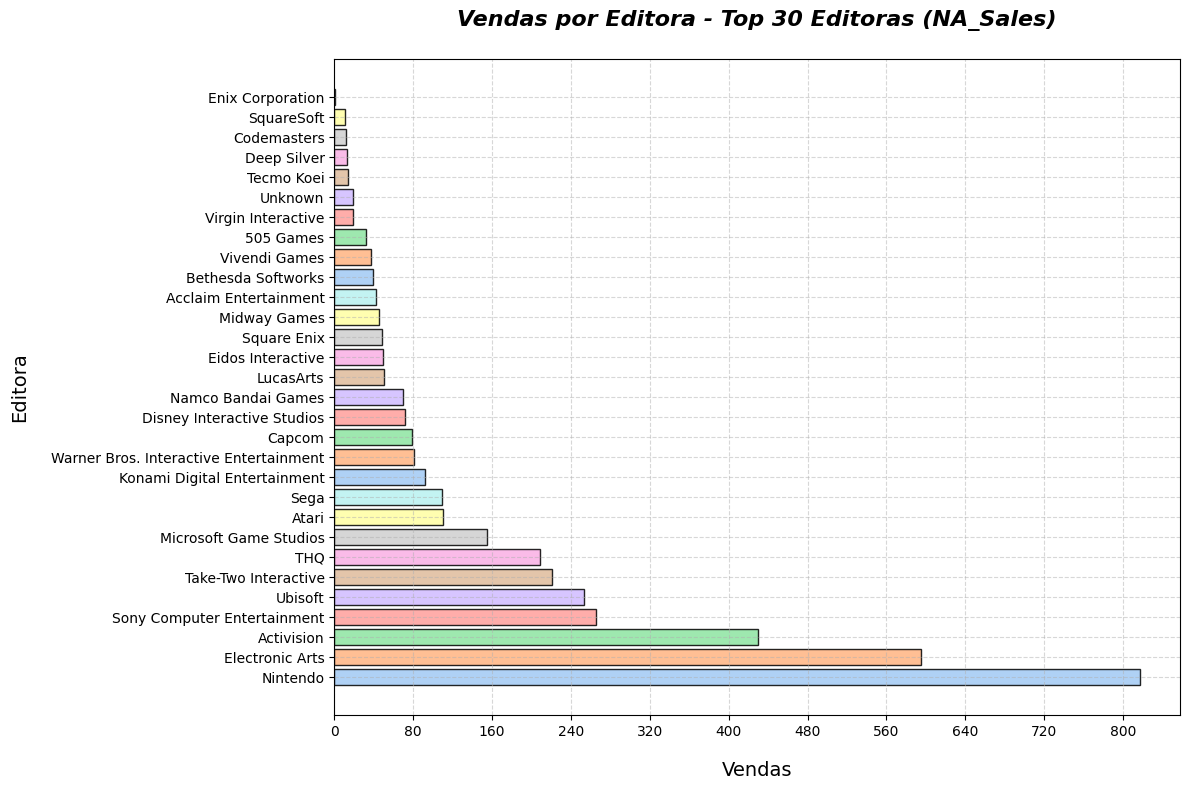

80


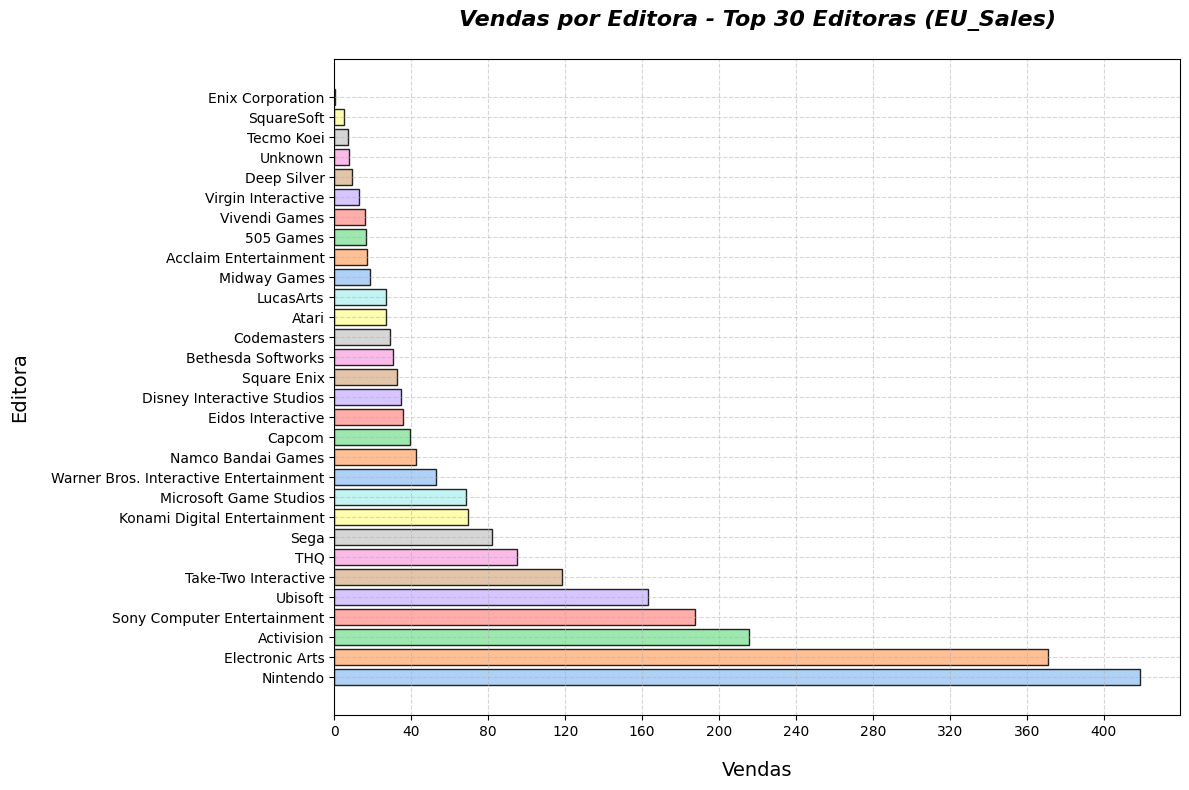

40


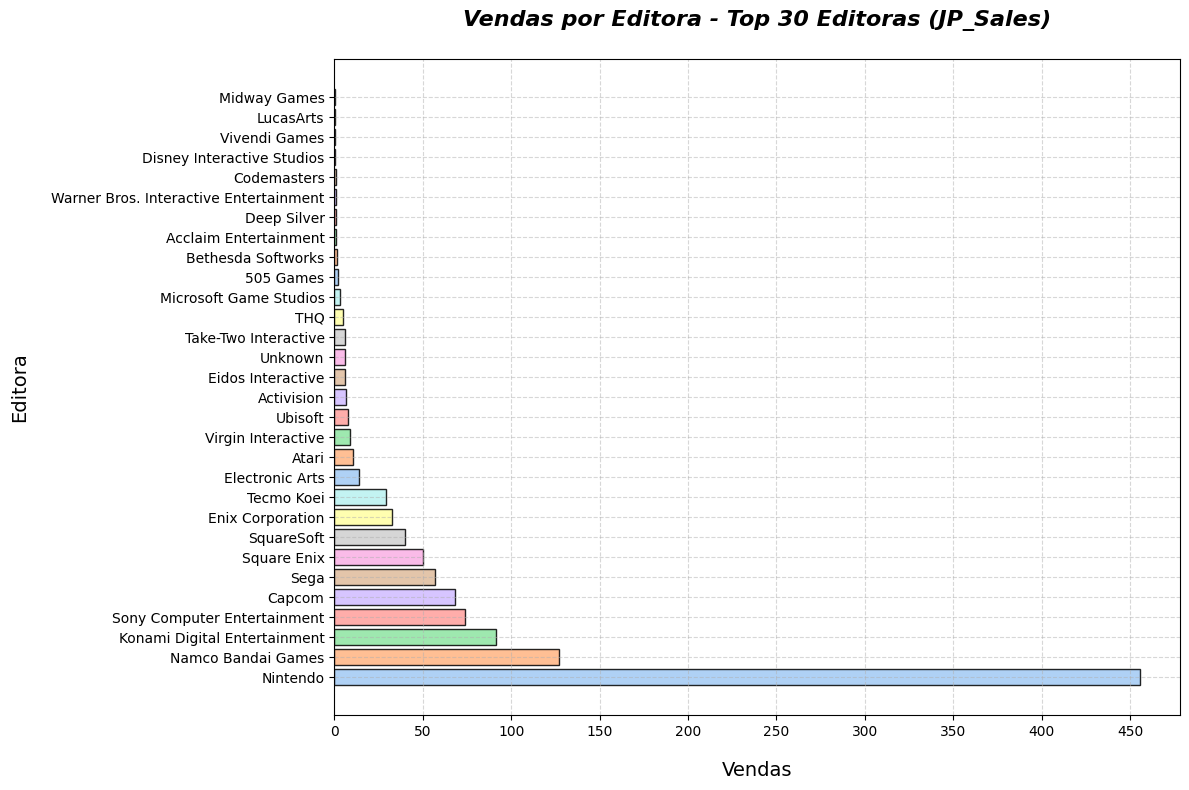

50


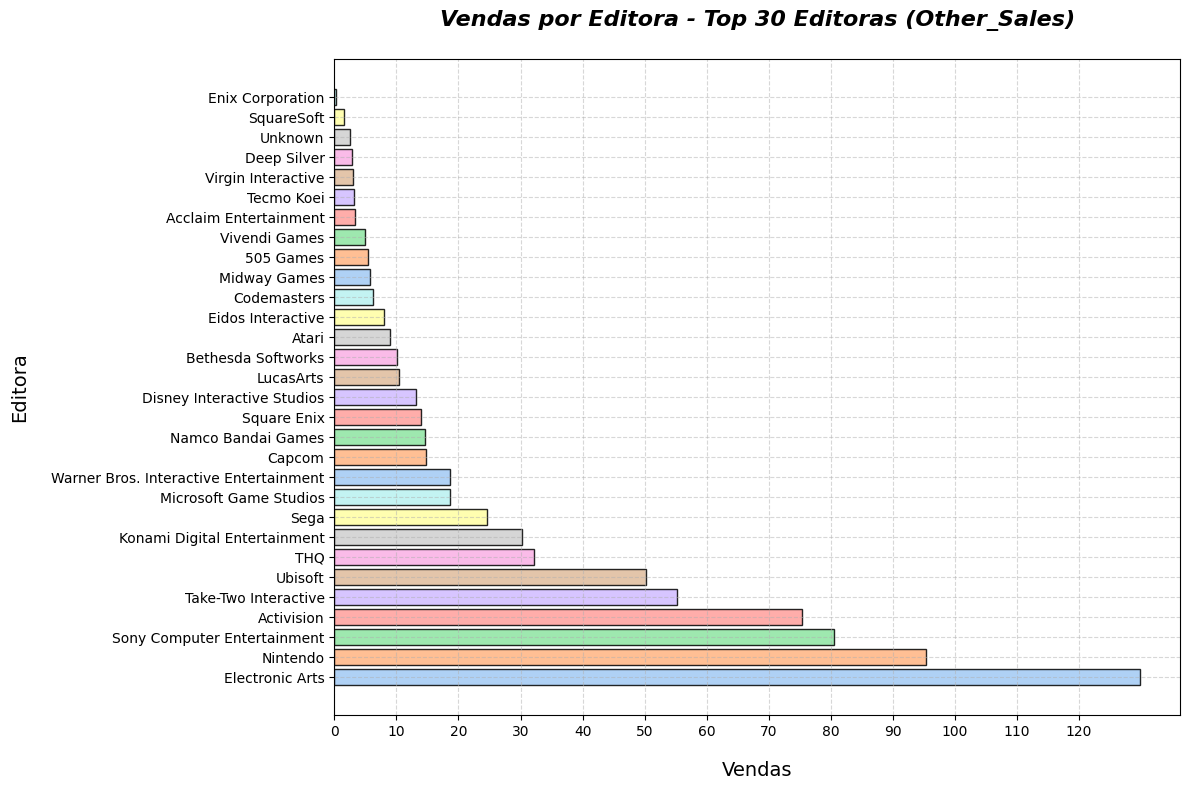

10


In [23]:
#Agrupar os dados por editora e calcular a soma das vendas globais para cada uma delas
vendas_por_editora = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

#Ordenar as editoras com base nas vendas globais em ordem decrescente
vendas_por_editora = vendas_por_editora.sort_values(by='Global_Sales', ascending=False)

#Selecionar apenas as top 30 editoras com mais vendas
top_30_editoras = vendas_por_editora.head(30)

#Agrupar os dados por editora e calcular a soma das vendas para cada tipo de console e cada coluna
vendas_por_tipo = df[df['Publisher'].isin(top_30_editoras['Publisher'])].groupby('Publisher')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

#Definir uma paleta de cores para as barras
cores = sns.color_palette("pastel", len(vendas_por_tipo))

#Criar o gráfico de barras horizontal para cada coluna
for coluna, cor in zip(vendas_por_tipo.columns, cores):
    #Ordenar as editoras com base nas vendas globais em ordem decrescente para esta coluna específica
    vendas_por_tipo_sorted = vendas_por_tipo.sort_values(by=coluna, ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.yticks(rotation=0)
    #Ajustar os valores de xticks de acordo com o valor máximo alcançado por coluna
    max_value = max(vendas_por_tipo_sorted[coluna])
    incremento = round(max_value / 10)  #Número de incrementos, neste caso, 10
    valor_arredondado = int(round(incremento, -1))
    plt.xticks(np.arange(0, round(max_value), valor_arredondado))
    
    bars = plt.barh(vendas_por_tipo_sorted.index, vendas_por_tipo_sorted[coluna], color=cores, edgecolor='black', alpha=.85)
    
    #Adicionar título e rótulos ao gráfico
    plt.title(f'Vendas por Editora - Top 30 Editoras ({coluna})', size=16, weight='bold', style='oblique', pad=24)
    plt.xlabel('Vendas', size=14, weight='medium', labelpad=16)
    plt.ylabel('Editora', size=14, weight='medium', labelpad=16)
    
    #Adicionar grid
    plt.grid(True, linestyle='--', alpha=.5)
    
    #Ajustar automaticamente a posição dos subplots para evitar que partes do gráfico sejam cortadas
    plt.tight_layout()

    #Salvar o gráfico
    #plt.savefig(f'Vendas por Editora - Top 30 Editoras ({coluna}).png')

    #Exibir o gráfico
    plt.show()
    print(valor_arredondado)


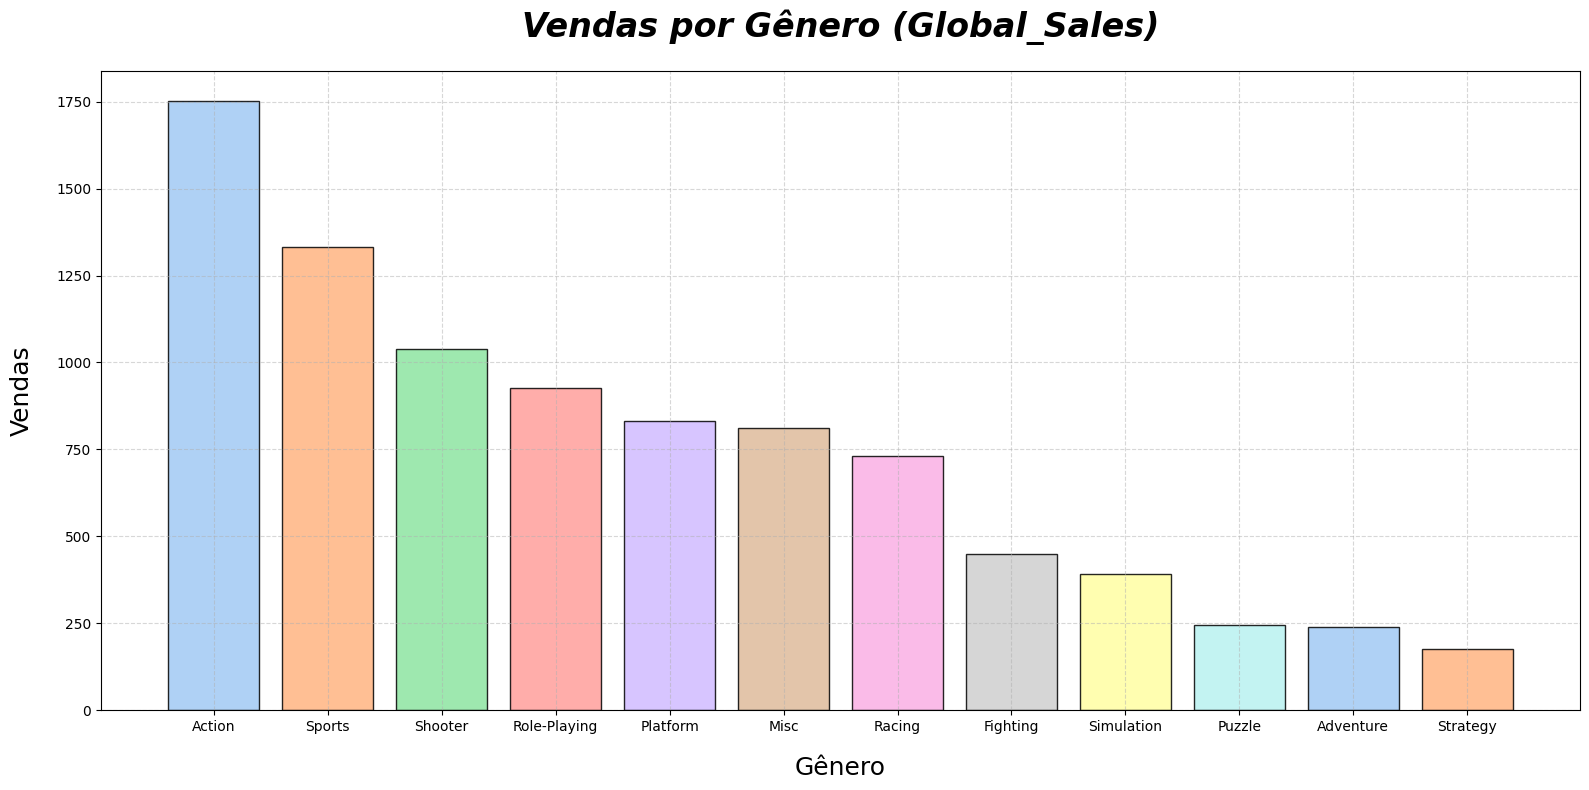

180


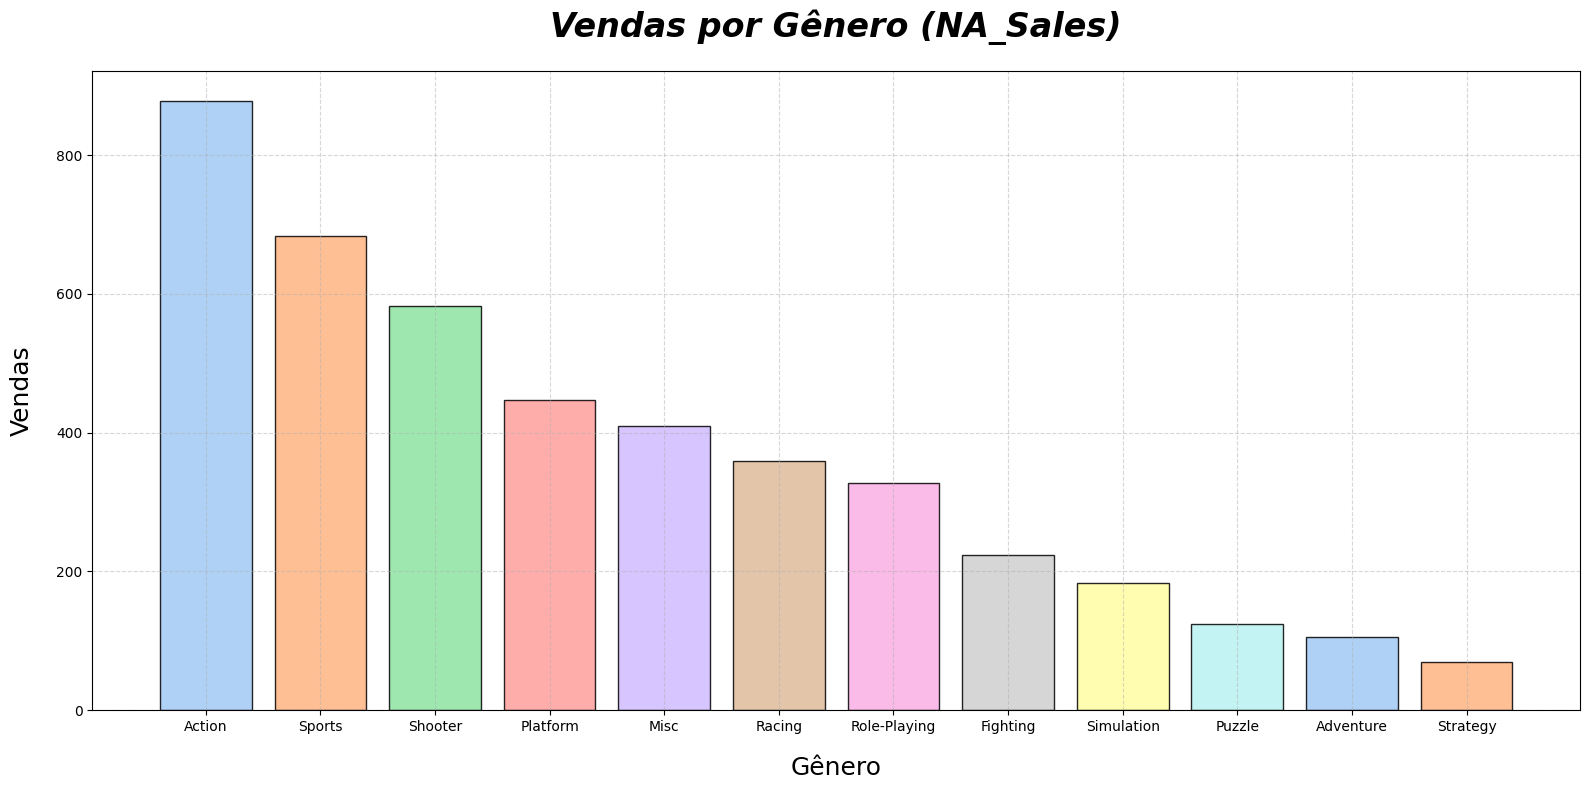

90


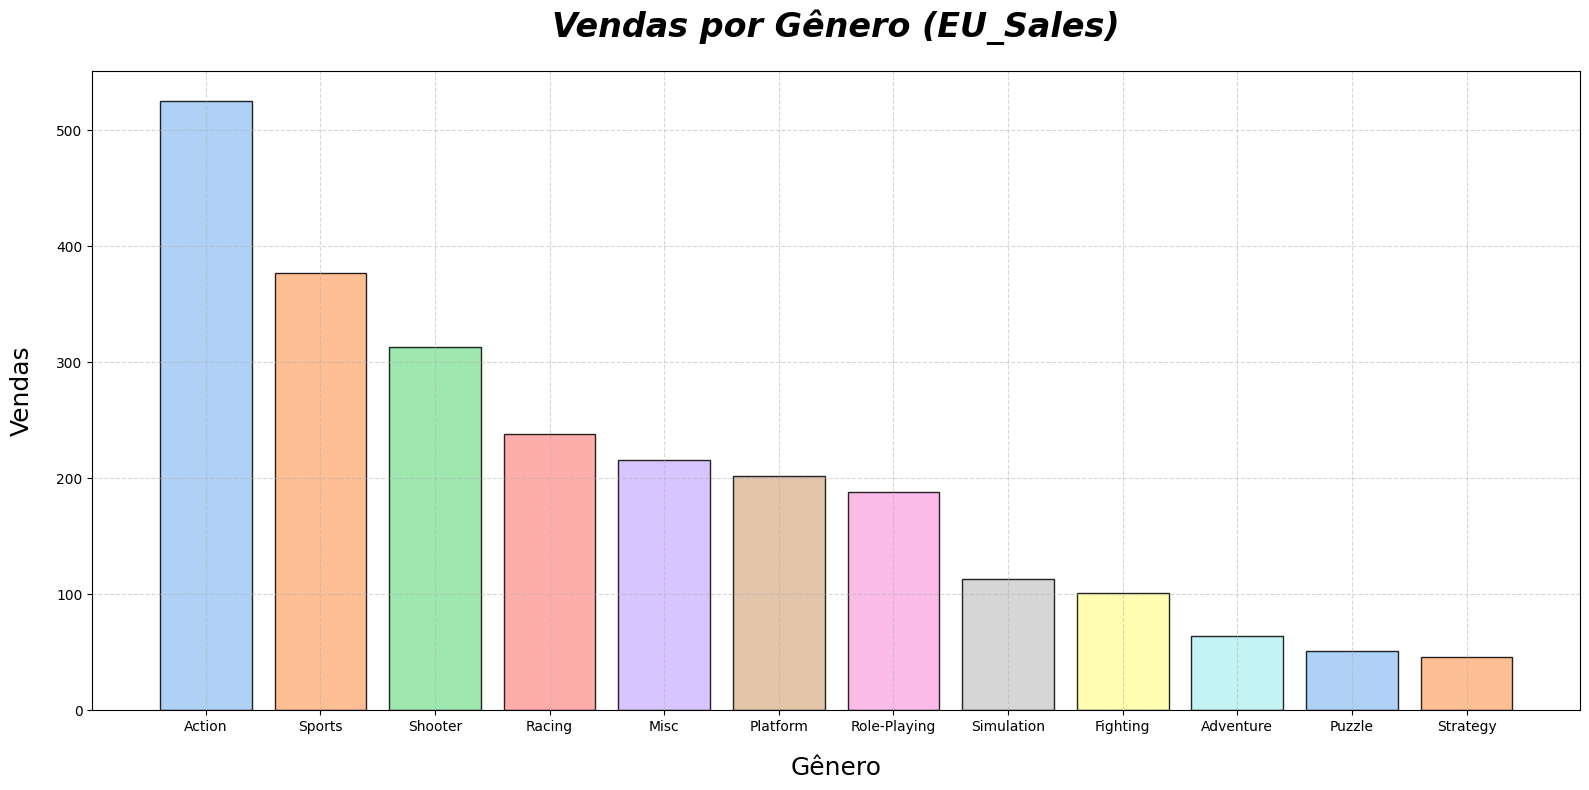

50


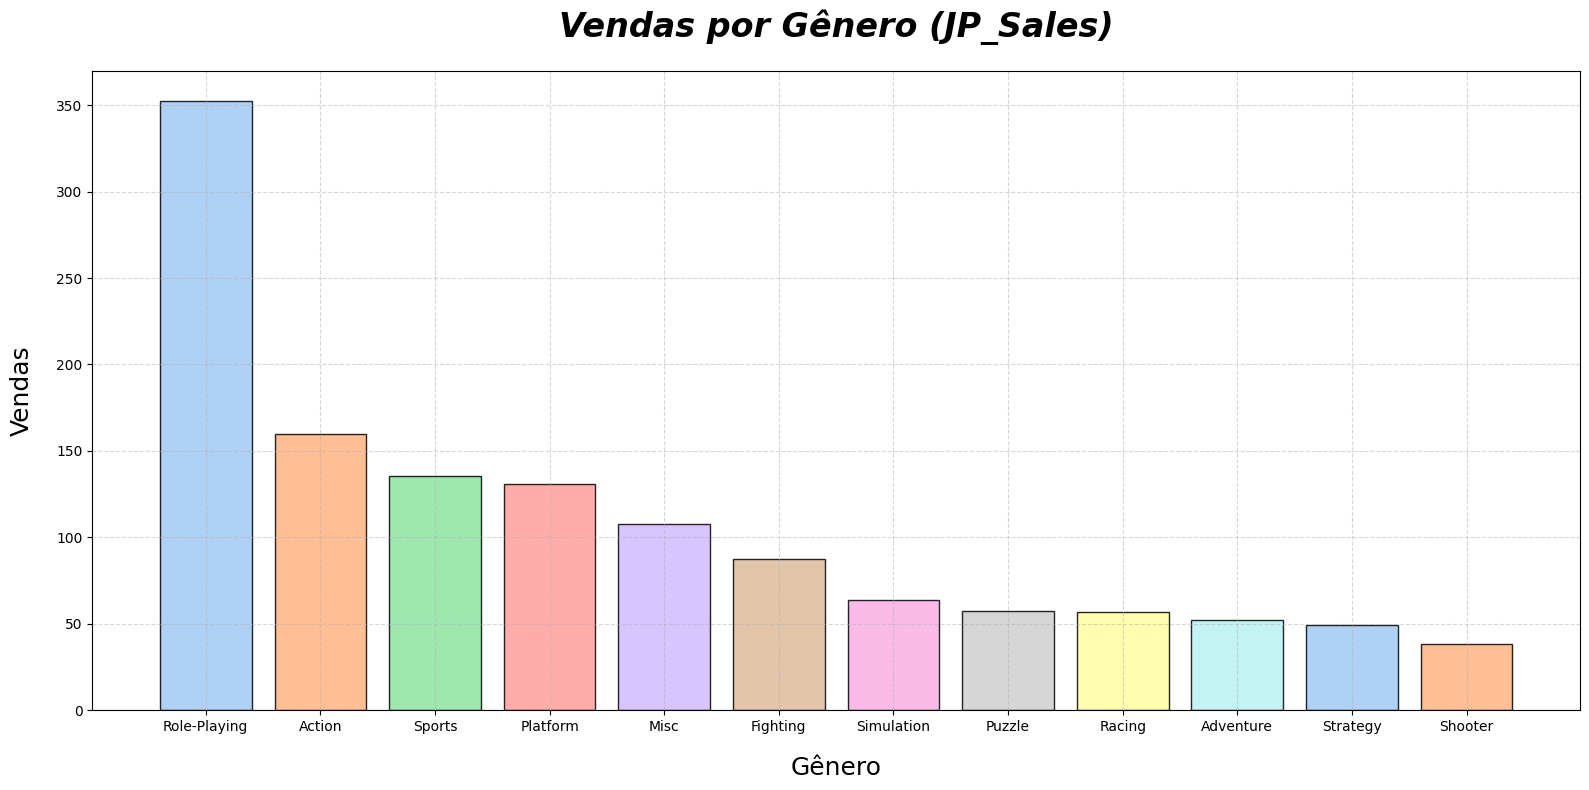

40


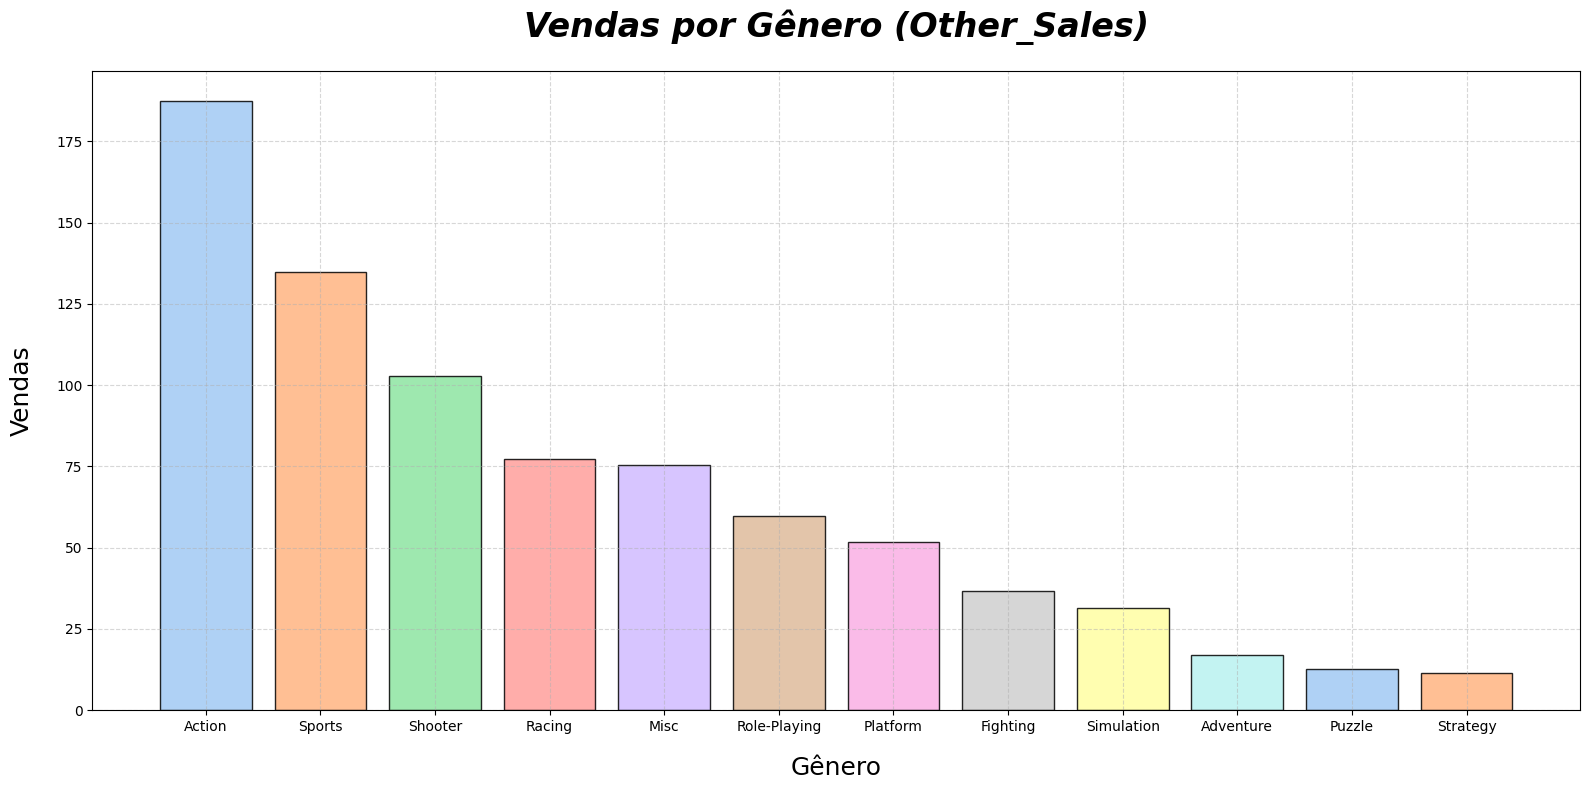

20


In [175]:
#Agrupar os dados por editora e calcular a soma das vendas globais para cada uma delas
vendas_por_editora = df.groupby('Genre')['Global_Sales'].sum().reset_index()

#Agrupar os dados por editora e calcular a soma das vendas para cada tipo de console e cada coluna
vendas_por_tipo = df.groupby('Genre')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

#Definir uma paleta de cores para as barras
cores = sns.color_palette("pastel", len(vendas_por_tipo))

#Criar o gráfico de barras horizontal para cada coluna
for coluna, cor in zip(vendas_por_tipo.columns, cores):
    #Ordenar as editoras com base nas vendas globais em ordem decrescente para esta coluna específica
    vendas_por_tipo_sorted = vendas_por_tipo.sort_values(by=coluna, ascending=False)
    
    plt.figure(figsize=(16, 8))
    plt.yticks(rotation=0)
    #Ajustar os valores de xticks de acordo com o valor máximo alcançado por coluna
    max_value = max(vendas_por_tipo_sorted[coluna])
    incremento = round(max_value / 10)  #Número de incrementos, neste caso, 10
    valor_arredondado = int(round(incremento, -1))
    
    bars = plt.bar(vendas_por_tipo_sorted.index, vendas_por_tipo_sorted[coluna], color=cores, edgecolor='black', alpha=.85)
    
    # Adicionar rótulos e título ao gráfico
    plt.title(f'Vendas por Gênero ({coluna})', size=24, weight='bold', style='oblique', pad=24)
    plt.xlabel('Gênero', size=18, weight='medium', labelpad=16)
    plt.ylabel('Vendas', size=18, weight='medium', labelpad=16)
    
    #Adicionar grid
    plt.grid(True, linestyle='--', alpha=.5)
    
    #Ajustar automaticamente a posição dos subplots para evitar que partes do gráfico sejam cortadas
    plt.tight_layout()
    
    #Salvar o gráfico
    #plt.savefig(f'Vendas por Gênero ({coluna})')

    #Exibir o gráfico
    plt.show()
    print(valor_arredondado)